# TensorFlow 入门课程学习


In [2]:
import pickle
import numpy
from tensorflow.examples.tutorials.mnist import input_data
## 训练数据集的图片是 mnist.train.images ，训练数据集的标签是 mnist.train.labels。
## MNIST数据集的图片就是在784维向量空间里面点的
## [60000, 784]
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


In [3]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
def initialize_variable(shape):
    return tf.Variable( tf.truncated_normal(shape , stddev=0.1))
def simple_net(x,keep_prob):
    W_conv1 = initialize_variable([5, 5, 1, 32])
    b_conv1 = initialize_variable([32])
    x = tf.reshape(x, [-1,28,28,1])

    x_image = tf.reshape(x, [-1,28,28,1])
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = initialize_variable([5, 5, 32, 64])
    b_conv2 = initialize_variable([64])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = initialize_variable([7 * 7 * 64, 1024])
    b_fc1 = initialize_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = initialize_variable([1024, 10])
    b_fc2 = initialize_variable([10])

    return tf.matmul(h_fc1_drop, W_fc2) + b_fc2
#We then convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool. 我们把x_image和权值向量进行卷积，加上偏置项，然后应用ReLU激活函数，最后进行max pooling。



In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()

epphoes = 10000
x= tf.placeholder(tf.float32,[None,784])
keep_prob = tf.placeholder("float")
logits = tf.nn.softmax(simple_net(x,keep_prob))
y_ = tf.placeholder(tf.float32, [None,10])


W = tf.Variable(0,name="weight")
b = tf.Variable(0,name ="bias")

cross_entropy = -tf.reduce_sum(y_*tf.log(logits))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())

for i in range(10000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print ("step %d, training accuracy %g"%(i, train_accuracy))
 #   train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    _,w_value,b_value = sess.run([train_step,W,b],feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    print("w: {} b: {}".format(w_value,b_value))
    

#saver =  tf.train.Saver()
#saver.save(sess,"./model.ckpt")

test = mnist.test.next_batch(100)
testIm = test[0][1].reshape([-1,784])
print(sess.run([simple_net(x,1)],feed_dict = {x:testIm}))
print ("test accuracy %g"%accuracy.eval(feed_dict={
    x: test[0], y_: test[1], keep_prob: 1.0}))

tf_var = tf.Variable(0, name="weight", trainable=False)

print(tf_var)

FailedPreconditionError: Attempting to use uninitialized value Variable_8
	 [[Node: Variable_8/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_8"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_8)]]
	 [[Node: add_7/_29 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_35_add_7", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Variable_8/read', defined at:
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/shenmutong/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-c54fed7b3ae8>", line 37, in <module>
    print(sess.run([simple_net(x,1)],feed_dict = {x:testIm}))
  File "<ipython-input-3-1f12aaed2098>", line 10, in simple_net
    W_conv1 = initialize_variable([5, 5, 1, 32])
  File "<ipython-input-3-1f12aaed2098>", line 8, in initialize_variable
    return tf.Variable( tf.truncated_normal(shape , stddev=0.1))
  File "/home/shenmutong/.local/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "/home/shenmutong/.local/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/shenmutong/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/shenmutong/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/shenmutong/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/shenmutong/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_8
	 [[Node: Variable_8/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_8"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_8)]]
	 [[Node: add_7/_29 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_35_add_7", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


step 9900, training accuracy 0.86
w: 0 b: 0


step 8800, training accuracy 0.8
w: 0 b: 0
step 8900, training accuracy 0.74
w: 0 b: 0
step 9000, training accuracy 0.88
w: 0 b: 0
step 9100, training accuracy 0.76
w: 0 b: 0
step 9200, training accuracy 0.8
w: 0 b: 0
step 9300, training accuracy 0.8
w: 0 b: 0
step 9400, training accuracy 0.88
w: 0 b: 0
step 9500, training accuracy 0.84
w: 0 b: 0
step 9600, training accuracy 0.82
w: 0 b: 0
step 9700, training accuracy 0.82
w: 0 b: 0
step 9800, training accuracy 0.92
w: 0 b: 0


step 7700, training accuracy 0.86
w: 0 b: 0
step 7800, training accuracy 0.82
w: 0 b: 0
step 7900, training accuracy 0.9
w: 0 b: 0
step 8000, training accuracy 0.86
w: 0 b: 0
step 8100, training accuracy 0.78
w: 0 b: 0
step 8200, training accuracy 0.8
w: 0 b: 0
step 8300, training accuracy 0.8
w: 0 b: 0
step 8400, training accuracy 0.78
w: 0 b: 0
step 8500, training accuracy 0.78
w: 0 b: 0
step 8600, training accuracy 0.82
w: 0 b: 0
step 8700, training accuracy 0.76
w: 0 b: 0


step 6600, training accuracy 0.82
w: 0 b: 0
step 6700, training accuracy 0.8
w: 0 b: 0
step 6800, training accuracy 0.8
w: 0 b: 0
step 6900, training accuracy 0.76
w: 0 b: 0
step 7000, training accuracy 0.8
w: 0 b: 0
step 7100, training accuracy 0.74
w: 0 b: 0
step 7200, training accuracy 0.86
w: 0 b: 0
step 7300, training accuracy 0.78
w: 0 b: 0
step 7400, training accuracy 0.7
w: 0 b: 0
step 7500, training accuracy 0.84
w: 0 b: 0
step 7600, training accuracy 0.68
w: 0 b: 0


step 5500, training accuracy 0.7
w: 0 b: 0
step 5600, training accuracy 0.8
w: 0 b: 0
step 5700, training accuracy 0.76
w: 0 b: 0
step 5800, training accuracy 0.78
w: 0 b: 0
step 5900, training accuracy 0.7
w: 0 b: 0
step 6000, training accuracy 0.74
w: 0 b: 0
step 6100, training accuracy 0.76
w: 0 b: 0
step 6200, training accuracy 0.7
w: 0 b: 0
step 6300, training accuracy 0.8
w: 0 b: 0
step 6400, training accuracy 0.8
w: 0 b: 0
step 6500, training accuracy 0.76
w: 0 b: 0


step 4400, training accuracy 0.58
w: 0 b: 0
step 4500, training accuracy 0.8
w: 0 b: 0
step 4600, training accuracy 0.68
w: 0 b: 0
step 4700, training accuracy 0.7
w: 0 b: 0
step 4800, training accuracy 0.74
w: 0 b: 0
step 4900, training accuracy 0.58
w: 0 b: 0
step 5000, training accuracy 0.74
w: 0 b: 0
step 5100, training accuracy 0.7
w: 0 b: 0
step 5200, training accuracy 0.68
w: 0 b: 0
step 5300, training accuracy 0.74
w: 0 b: 0
step 5400, training accuracy 0.78
w: 0 b: 0


step 3300, training accuracy 0.5
w: 0 b: 0
step 3400, training accuracy 0.62
w: 0 b: 0
step 3500, training accuracy 0.54
w: 0 b: 0
step 3600, training accuracy 0.66
w: 0 b: 0
step 3700, training accuracy 0.56
w: 0 b: 0
step 3800, training accuracy 0.68
w: 0 b: 0
step 3900, training accuracy 0.7
w: 0 b: 0
step 4000, training accuracy 0.7
w: 0 b: 0
step 4100, training accuracy 0.66
w: 0 b: 0
step 4200, training accuracy 0.58
w: 0 b: 0
step 4300, training accuracy 0.64
w: 0 b: 0


step 2200, training accuracy 0.58
w: 0 b: 0
step 2300, training accuracy 0.58
w: 0 b: 0
step 2400, training accuracy 0.52
w: 0 b: 0
step 2500, training accuracy 0.6
w: 0 b: 0
step 2600, training accuracy 0.6
w: 0 b: 0
step 2700, training accuracy 0.54
w: 0 b: 0
step 2800, training accuracy 0.58
w: 0 b: 0
step 2900, training accuracy 0.56
w: 0 b: 0
step 3000, training accuracy 0.64
w: 0 b: 0
step 3100, training accuracy 0.58
w: 0 b: 0
step 3200, training accuracy 0.56
w: 0 b: 0


step 1100, training accuracy 0.18
w: 0 b: 0
step 1200, training accuracy 0.36
w: 0 b: 0
step 1300, training accuracy 0.32
w: 0 b: 0
step 1400, training accuracy 0.32
w: 0 b: 0
step 1500, training accuracy 0.34
w: 0 b: 0
step 1600, training accuracy 0.42
w: 0 b: 0
step 1700, training accuracy 0.38
w: 0 b: 0
step 1800, training accuracy 0.36
w: 0 b: 0
step 1900, training accuracy 0.52
w: 0 b: 0
step 2000, training accuracy 0.64
w: 0 b: 0
step 2100, training accuracy 0.4
w: 0 b: 0


step 0, training accuracy 0.16
w: 0 b: 0
step 100, training accuracy 0.1
w: 0 b: 0
step 200, training accuracy 0.14
w: 0 b: 0
step 300, training accuracy 0.1
w: 0 b: 0
step 400, training accuracy 0.28
w: 0 b: 0
step 500, training accuracy 0.14
w: 0 b: 0
step 600, training accuracy 0.26
w: 0 b: 0
step 700, training accuracy 0.14
w: 0 b: 0
step 800, training accuracy 0.2
w: 0 b: 0
step 900, training accuracy 0.3
w: 0 b: 0
step 1000, training accuracy 0.2
w: 0 b: 0


Instructions for updating:
Use `tf.global_variables_initializer` instead.


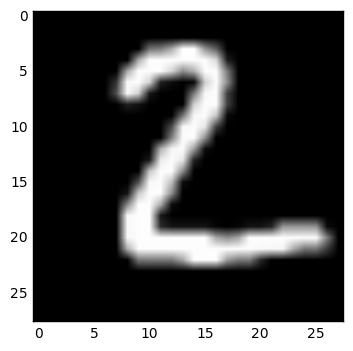

(100, 784)
(28, 28)


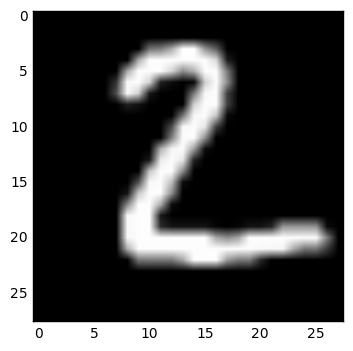

(100, 784)
(28, 28)


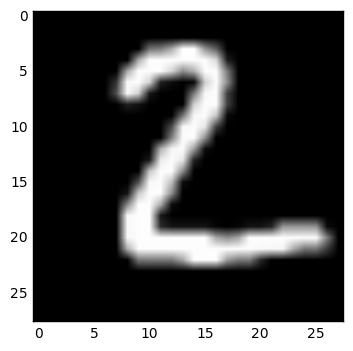

(100, 784)
(28, 28)


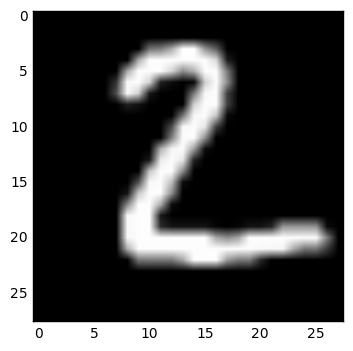

(100, 784)
(28, 28)


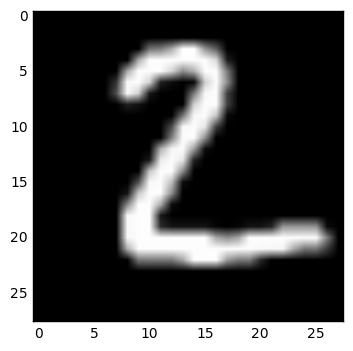

(100, 784)
(28, 28)


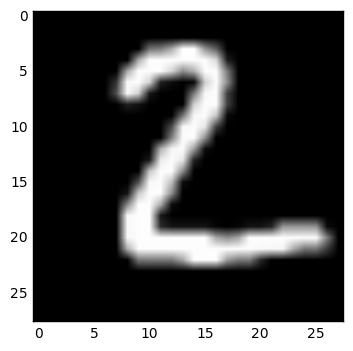

(100, 784)
(28, 28)


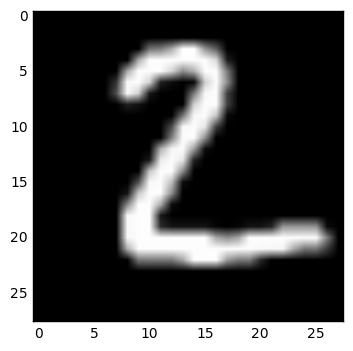

(100, 784)
(28, 28)


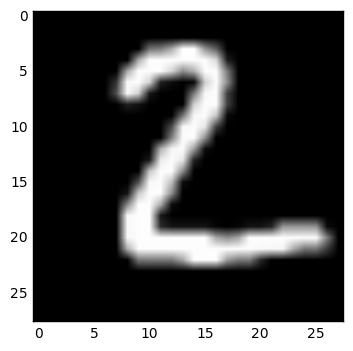

(100, 784)
(28, 28)


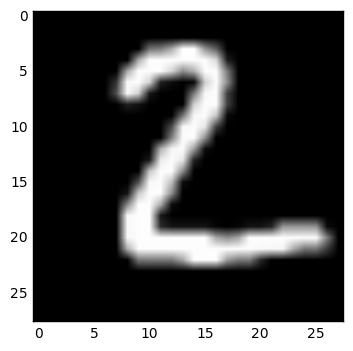

(100, 784)
(28, 28)


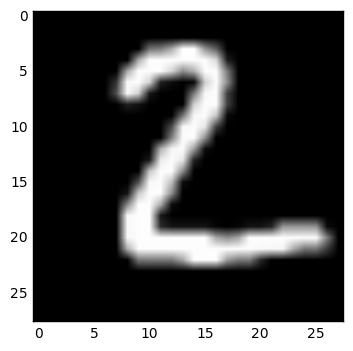

(784,)
(100, 784)
(28, 28)


In [6]:
print(test[0][0].shape)
for i in range(10):
    print(test[0].shape)
    image = test[0][1].reshape([28,28])
    print(image.shape)
    plt.imshow(image, cmap='gray')    
    plt.show()

In [0]:
cross_entropy = -tf.reduce_sum(y_*tf.log(logits))
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()
accuarcyList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(epphoes) :
        batch = mnist.train.next_batch(100)
        sess.run(train_step,feed_dict={x:batch[0],y_:batch[1]})
        tf.argmax(y_,1)
        correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("EPHOCHES = ", i)
        accuracyValue = accuracy.eval(feed_dict={x:mnist.test.images,y_:mnist.test.labels})
        print(accuracyValue)
        accuarcyList.append(accuracyValue)

plt.plot(accuarcyList)
plt.show()
    
                                                              